In [1]:
import numpy as np
import numpy.random as r
import matplotlib.pyplot as plt

Сгенерируем данные как y = 2X + 5 + белый шум

In [2]:
X = 3 * r.rand(300,1)

In [3]:
y = 5 + 2*X + r.randn(300,1)

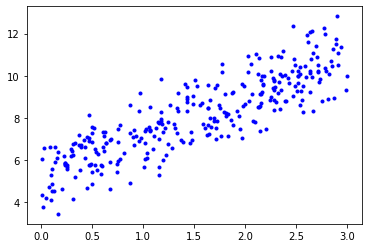

In [4]:
plt.plot(X, y, "b.")

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.333, random_state=1)

In [7]:
X_train.shape

(200, 1)

Добавляем 1 в матрицу прихнаков для свободного члена ($X_0 = 1$)

In [8]:
X_train1=np.c_[np.ones((200,1)),X_train]

In [9]:
X_train1[:3]

array([[1.        , 0.50027302],
       [1.        , 2.53673648],
       [1.        , 0.74365078]])

Решим нормальное уравнение $w = \left(X^T X\right)^{-1}X^T y$

In [10]:
w=np.linalg.inv(X_train1.T.dot(X_train1)).dot(X_train1.T).dot(y_train)

In [11]:
w

array([[5.2775982 ],
       [1.85521656]])

In [12]:
from sklearn.linear_model import LinearRegression

In [13]:
reg = LinearRegression().fit(X_train1, y_train)

Те же самые коэффициенты

In [14]:
reg.intercept_[0], reg.coef_[0,1]

(5.277598198436827, 1.8552165582625357)

Заметим, что полученные значения близки к реальным 5 и 2 (y = 2X + 5 + белый шум)

In [15]:
y_pred = w[1]*X_test + w[0]

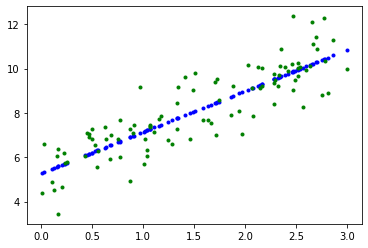

In [16]:
plt.plot(X_test, y_pred, "b.")
plt.plot(X_test, y_test, "g.")